**Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os

np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Agrupamento - MNIST

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


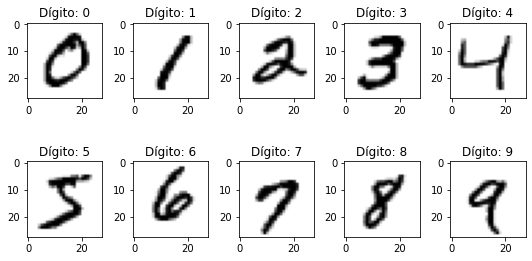

In [4]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[Y_train == i][0], cmap='gray_r')
    ax.set_title('Dígito: {}'.format(i))
plt.tight_layout()
#plt.suptitle("Amostra dos dados", fontsize=14)
plt.show()

In [5]:
from PIL import Image

In [6]:
X_train = np.array([np.array(Image.fromarray(X_train[i,:,:]).resize((10,10))) for i in range(len(X_train))]).reshape(60000,10,10)

In [7]:
X_train = np.array([X_train[Y_train == i][:600] for i in range(10)]).reshape((6000, 10, 10))

Y_train = np.array([600*[i] for i in range(10)]).reshape((6000,))

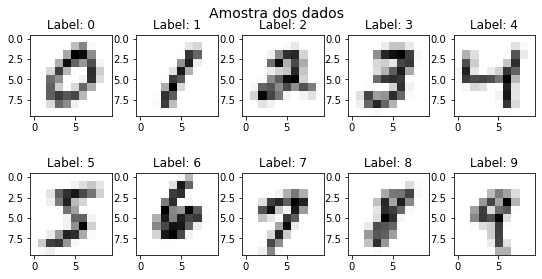

In [8]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[Y_train == i][0], cmap='gray_r')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.suptitle("Amostra dos dados", fontsize=14)
plt.show()

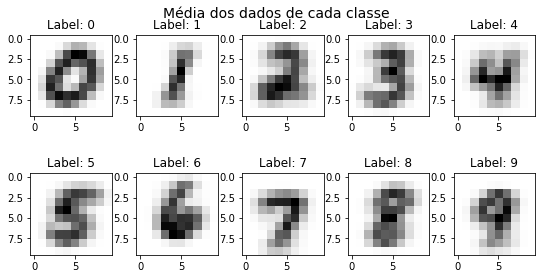

In [9]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[Y_train == i].mean(axis=0), cmap='gray_r')
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.suptitle("Média dos dados de cada classe", fontsize=14)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
X_train_flat = scaler.fit_transform(X_train.reshape(6000,10**2))

In [12]:
centroides = [np.random.rand(10,10**2) for i in range(10)]

### Aplicação do K-means

In [15]:
from sklearn.cluster import KMeans

melhor_acuracia = 0

for cent_init in centroides:

    kmeans = KMeans(n_clusters = 10, init = cent_init, random_state = 42)

    kmeans.fit(X_train_flat)

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((kmeans.labels_ == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    #plt.figure(figsize = (10,7))
    #sns.heatmap(df_cm, annot=True)
    #plt.tight_layout()
    #plt.show()

    c = df_cm.copy()
    mapping = {}
    
    for a in range(10):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)
    
    Y_pred = np.array([mapping[x] for x in kmeans.labels_])

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    #plt.figure(figsize = (10,7))
    #sns.heatmap(df_cm, annot=True)
    #plt.tight_layout()
    #plt.show()

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix
    
    print('Acurácia:', acuracia)

Acurácia: 0.5301666666666667
Acurácia: 0.4003333333333333
Acurácia: 0.49733333333333335
Acurácia: 0.4688333333333333
Acurácia: 0.5391666666666667
Acurácia: 0.4891666666666667
Acurácia: 0.5595
Acurácia: 0.492
Acurácia: 0.437
Acurácia: 0.527


In [17]:
np.unique(melhor_ypred, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 350, 1156,  425,  823,  727,  259,  554,  462,  679,  565],
       dtype=int64))

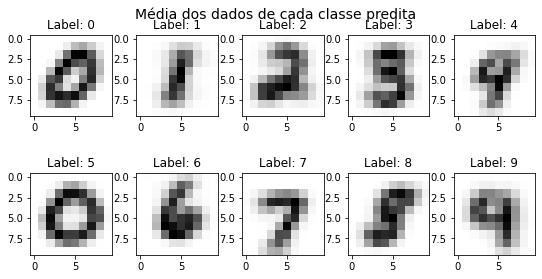

In [12]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    try:
        ax.imshow(X_train_flat.reshape(6000,10,10)[melhor_ypred == i].mean(axis=0), cmap='gray_r')
    except:
        pass
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.suptitle("Média dos dados de cada classe predita", fontsize=14)
plt.show()

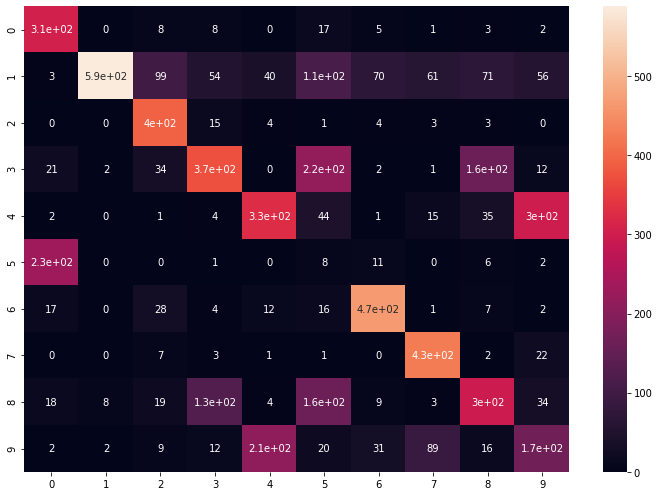

In [13]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo exato

In [ ]:
from hard import kmeans_constraints_exato

melhor_acuracia = 0

for cent_init in centroides[3:]:

    n_samples = len(X_train_flat)
    clusters = 10

    Z = np.ones((n_samples,))
    mu = Z.sum()/clusters*np.ones((clusters,))

    LABELS = kmeans_constraints_exato(X_train_flat,Z,clusters,cent_init,mu)

    labels = LABELS[-1]

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    #plt.figure(figsize = (10,7))
    #sns.heatmap(df_cm, annot=True)
    #fig.tight_layout()
    #plt.show()

    c = df_cm.copy()
    mapping = {}
    
    for a in range(10):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in labels])

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    #plt.figure(figsize = (10,7))
    #sns.heatmap(df_cm, annot=True)
    #fig.tight_layout()
    #plt.show()

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix
    
    print('Acurácia:', acuracia)

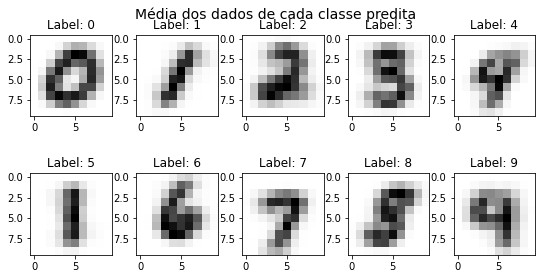

In [12]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    try:
        ax.imshow(X_train_flat.reshape(6000,10,10)[melhor_ypred == i].mean(axis=0), cmap='gray_r')
    except:
        pass
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.suptitle("Média dos dados de cada classe predita", fontsize=14)
plt.show()

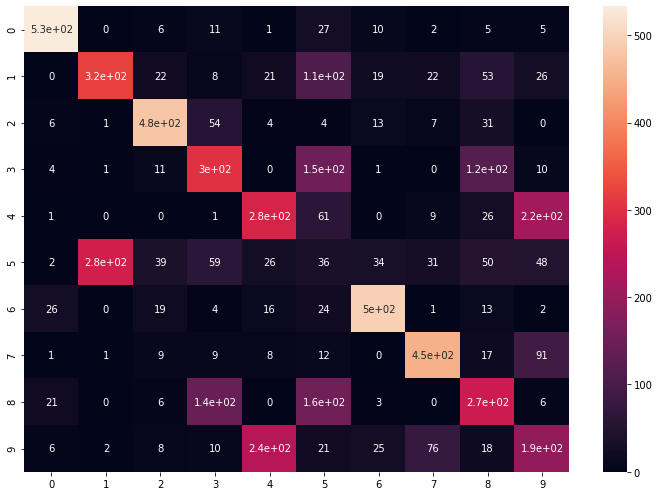

In [14]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

### Aplicação do K-means adaptativo com função de priorização

In [16]:
from hard import pert_quad, kmeans_capacity_constraints

melhor_acuracia = 0

for cent_init in centroides:

    n_samples = len(X_train_flat)
    clusters = 10

    Z = np.ones((n_samples,))
    mu = Z.sum()/clusters*np.ones((clusters,))

    LABELS, _ = kmeans_capacity_constraints(X_train_flat,Z,clusters,pert_quad,cent_init,mu)

    labels = LABELS[-1]

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((labels == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    c = df_cm.copy()
    mapping = {}
    
    for a in range(10):
        ind_x, ind_y = np.unravel_index(np.argmax(c, axis=None), c.shape)
        mapping[int(c.index[ind_x])] = int(c.columns[ind_y])
        c.drop([c.index[ind_x]], axis=0, inplace=True)
        c.drop([c.columns[ind_y]], axis=1, inplace=True)

    Y_pred = np.array([mapping[x] for x in labels])

    confusion_matrix = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            confusion_matrix[i,j] = sum((Y_pred == i) & (Y_train == j))

    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

    acuracia = np.sum(confusion_matrix.diagonal())/np.sum(confusion_matrix)
    if melhor_acuracia<acuracia:
        melhor_acuracia=acuracia
        melhor_ypred = Y_pred
        melhor_confusion_matrix = confusion_matrix
    
    print('Acurácia:', acuracia)

Acurácia: 0.4146666666666667
Acurácia: 0.3353333333333333
Acurácia: 0.3526666666666667
Acurácia: 0.35083333333333333
Acurácia: 0.381
Acurácia: 0.3335
Acurácia: 0.41533333333333333
Acurácia: 0.33466666666666667
Acurácia: 0.31616666666666665
Acurácia: 0.304


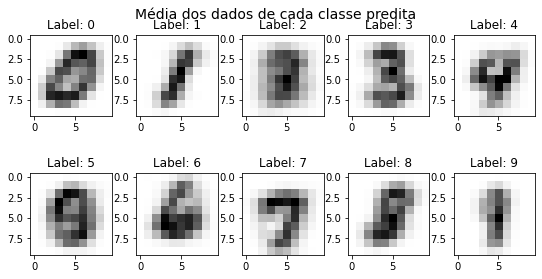

In [17]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    try:
        ax.imshow(X_train_flat.reshape(6000,10,10)[melhor_ypred == i].mean(axis=0), cmap='gray_r')
    except:
        pass
    ax.set_title('Label: {}'.format(i))
plt.tight_layout()
plt.suptitle("Média dos dados de cada classe predita", fontsize=14)
plt.show()

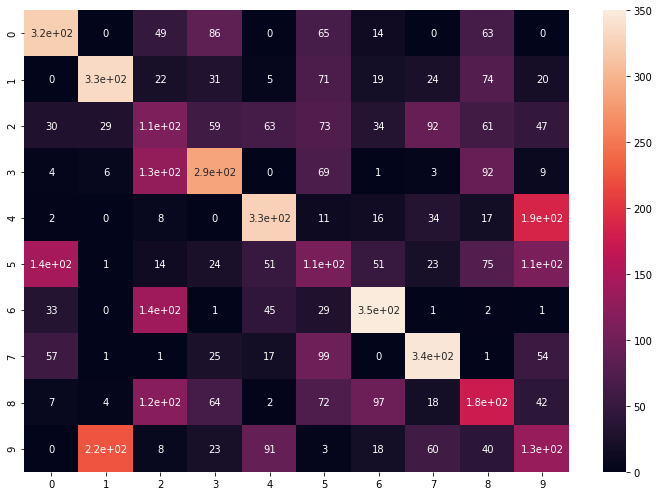

In [18]:
df_cm = pd.DataFrame(melhor_confusion_matrix, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.tight_layout()
plt.show()

In [18]:
boxplot = pd.DataFrame()

boxplot['K-means'] = [0.5301,0.4003,0.4973,0.4688,0.5391,0.4891,0.5595,0.4920,0.4370,0.5270]
boxplot['Algoritmo 2'] = [0.5343,0.5593,0.5346,0.5358,0.5605,0.5333,0.5595,0.5571,0.5568,0.5315]
boxplot['Algoritmo 3'] = [0.4146,0.3353,0.3526,0.3508,0.3810,0.3335,0.4153,0.3346,0.3161,0.3040]

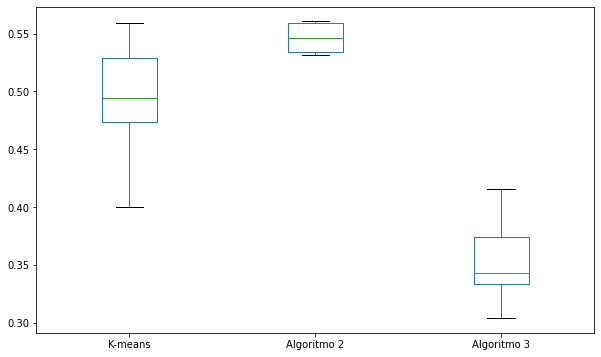

In [20]:
import pandas as pd
fig = plt.figure(figsize=(10,6))
boxplot.boxplot()

plt.grid(None)
#fig.savefig('figures/'+path+'_boxplot.png')
plt.show()